In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Loading
ratings = pd.read_csv('../res/ratings_netflix.csv')
movies = pd.read_csv('../res/movies_netflix.csv')

In [3]:
print(50 * "=")
print("Movies Data Preview")
print(50 * "=")

print("Shape:", movies.shape)
print("\nData types:\n", movies.dtypes)
print("\nMissing values:\n", movies.isna().sum())

# Numeric summary
print("\nNumeric summary:\n", movies.describe())

# Categorical summary (safe version)
categorical_cols = movies.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    print("\nCategorical summary:\n", movies[categorical_cols].describe())
else:
    print("\nNo categorical columns found.")


# Show first and last rows
display(movies.head(), movies.tail())

Movies Data Preview
Shape: (5175, 3)

Data types:
 movieId     int64
title      object
genres     object
dtype: object

Missing values:
 movieId    0
title      0
genres     0
dtype: int64

Numeric summary:
              movieId
count    5175.000000
mean   164702.106667
std     69350.285515
min         7.000000
25%    134859.000000
50%    178649.000000
75%    209178.000000
max    292533.000000

Categorical summary:
                  title genres
count             5175   5175
unique            5175    467
top     Sabrina (1995)  Drama
freq                 1    641


,movieId,title,genres
0,7,Sabrina (1995),Comedy|Romance
1,10,GoldenEye (1995),Action|Adventure|Thriller
2,13,Balto (1995),Adventure|Animation|Children
3,27,Now and Then (1995),Children|Drama
4,38,It Takes Two (1995),Children|Comedy


,movieId,title,genres
5170,291371,Captive (2023),Horror|Thriller
5171,291717,The Mountain (2023),Drama|Fantasy
5172,292123,Loco Love (2017),Romance
5173,292473,The American Game (1979),Documentary
5174,292533,Home (2023),Crime|Drama


In [4]:
print(50 * "=")
print("Ratings Data Preview")
print(50 * "=")

print("Shape:", ratings.shape)
print("\nData types:\n", ratings.dtypes)
print("\nMissing values:\n", ratings.isna().sum())

# Numeric summary
print("\nNumeric summary:\n", ratings.describe())

# Categorical summary (safe version)
categorical_cols = ratings.select_dtypes(include=['object', 'category']).columns

if len(categorical_cols) > 0:
    print("\nCategorical summary:\n", ratings[categorical_cols].describe())
else:
    print("\nNo categorical columns found.")


# Show first and last rows
display(ratings.head(), ratings.tail())

Ratings Data Preview
Shape: (4624438, 4)

Data types:
 userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

Missing values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Numeric summary:
              userId       movieId        rating     timestamp
count  4.624438e+06  4.624438e+06  4.624438e+06  4.624438e+06
mean   1.003442e+05  3.918692e+04  3.560647e+00  1.319032e+09
std    5.790520e+04  5.511119e+04  1.053608e+00  2.520088e+08
min    1.000000e+00  7.000000e+00  5.000000e-01  8.228736e+08
25%    5.018100e+04  1.387000e+03  3.000000e+00  1.111477e+09
50%    1.004430e+05  5.013000e+03  4.000000e+00  1.386643e+09
75%    1.503360e+05  6.823700e+04  4.000000e+00  1.534976e+09
max    2.009480e+05  2.925330e+05  5.000000e+00  1.697164e+09

No categorical columns found.


,userId,movieId,rating,timestamp
0,1,111,5.0,944249008
1,1,527,3.0,943231120
2,1,915,5.0,944082760
3,1,971,3.0,944253272
4,1,1080,1.0,944079496


,userId,movieId,rating,timestamp
4624433,200948,54503,4.5,1206299086
4624434,200948,58293,2.0,1214128713
4624435,200948,72011,4.5,1350423792
4624436,200948,74458,4.5,1350423822
4624437,200948,79702,4.5,1294412589


In [5]:
title = movies[movies['movieId']==111]['title'].values[0]
num_of_ratings = sum(ratings['movieId']==111)
mean_rating = ratings[ratings['movieId']==111]['rating'].mean()

print(f"Title: {title}")
print(f"Total Ratings: {num_of_ratings}")
print(f"Average Rating: {mean_rating}")

Title: Taxi Driver (1976)
Total Ratings: 36647
Average Rating: 4.076663846972467


<Axes: xlabel='rating', ylabel='count'>

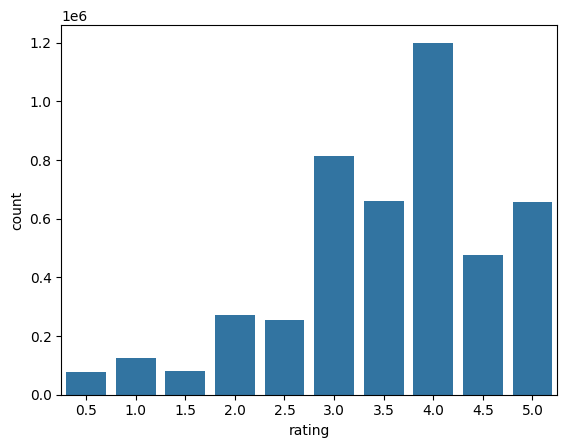

In [6]:
# Visualizations
sns.countplot(x='rating',data=ratings)

In [7]:
movies['title'].value_counts().head(10)

title
Sabrina (1995)                          1
GoldenEye (1995)                        1
Balto (1995)                            1
Now and Then (1995)                     1
It Takes Two (1995)                     1
Mortal Kombat (1995)                    1
How to Make an American Quilt (1995)    1
Eye for an Eye (1996)                   1
Kicking and Screaming (1995)            1
Taxi Driver (1976)                      1
Name: count, dtype: int64

In [8]:
data = pd.merge(ratings,movies,on='movieId')
display(data)

,userId,movieId,rating,timestamp,title,genres
0,1,111,5.0,944249008,Taxi Driver (1976),Crime|Drama|Thriller
1,1,527,3.0,943231120,Schindler's List (1993),Drama|War
2,1,915,5.0,944082760,Sabrina (1954),Comedy|Romance
3,1,971,3.0,944253272,Cat on a Hot Tin Roof (1958),Drama
4,1,1080,1.0,944079496,Monty Python's Life of Brian (1979),Comedy
...,...,...,...,...,...,...
4624433,200948,54503,4.5,1206299086,Superbad (2007),Comedy
4624434,200948,58293,2.0,1214128713,"10,000 BC (2008)",Adventure|Romance|Thriller
4624435,200948,72011,4.5,1350423792,Up in the Air (2009),Drama|Romance
4624436,200948,74458,4.5,1350423822,Shutter Island (2010),Drama|Mystery|Thriller


In [9]:
# Movie rating statistics
stats = pd.DataFrame(data.groupby('title')['rating'].mean(),columns = ['rating'])
stats['count'] = data.groupby('title')['rating'].count()
stats

,rating,count
title,,
#Alive (2020),3.310268,224
#AnneFrank. Parallel Stories (2019),2.583333,6
#FriendButMarried (2018),0.750000,2
#FriendButMarried 2 (2020),1.000000,1
#Roxy (2018),0.750000,2
...,...,...
iBoy (2017),2.939698,199
unknown (2005),3.000000,1
xXx (2002),2.785063,7344


<Axes: xlabel='rating', ylabel='count'>

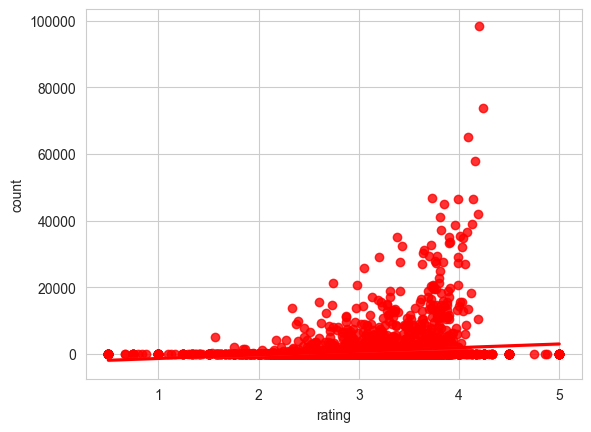

In [10]:
sns.set_style('whitegrid')
sns.regplot(x='rating',y='count',data = stats,color='r')

<Axes: xlabel='rating', ylabel='count'>

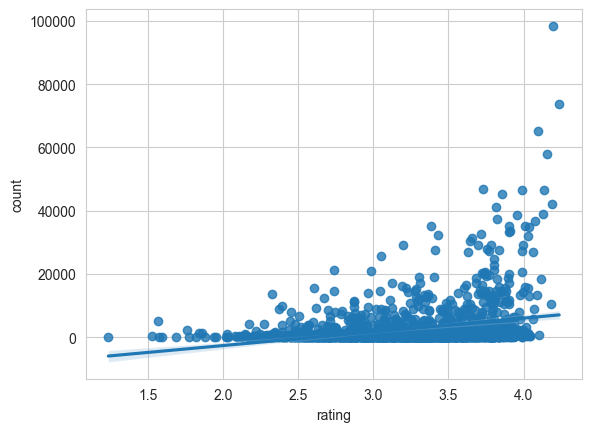

In [11]:
sns.regplot(x='rating',y='count',data = stats[stats['count']>50])

In [12]:
stats.sort_values(by='count',ascending=False).head(10)

,rating,count
title,,
Pulp Fiction (1994),4.196969,98409
Schindler's List (1993),4.236990,73849
American Beauty (1999),4.093051,65158
Inception (2010),4.157170,57931
Dances with Wolves (1990),3.728956,46771
Monty Python and the Holy Grail (1975),4.135633,46508
Indiana Jones and the Last Crusade (1989),3.986865,46401
Kill Bill: Vol. 1 (2003),3.853562,45135
Goodfellas (1990),4.188427,42003


Graph contains 5225 nodes and 1561 edges
Users: 50, Movies: 5175


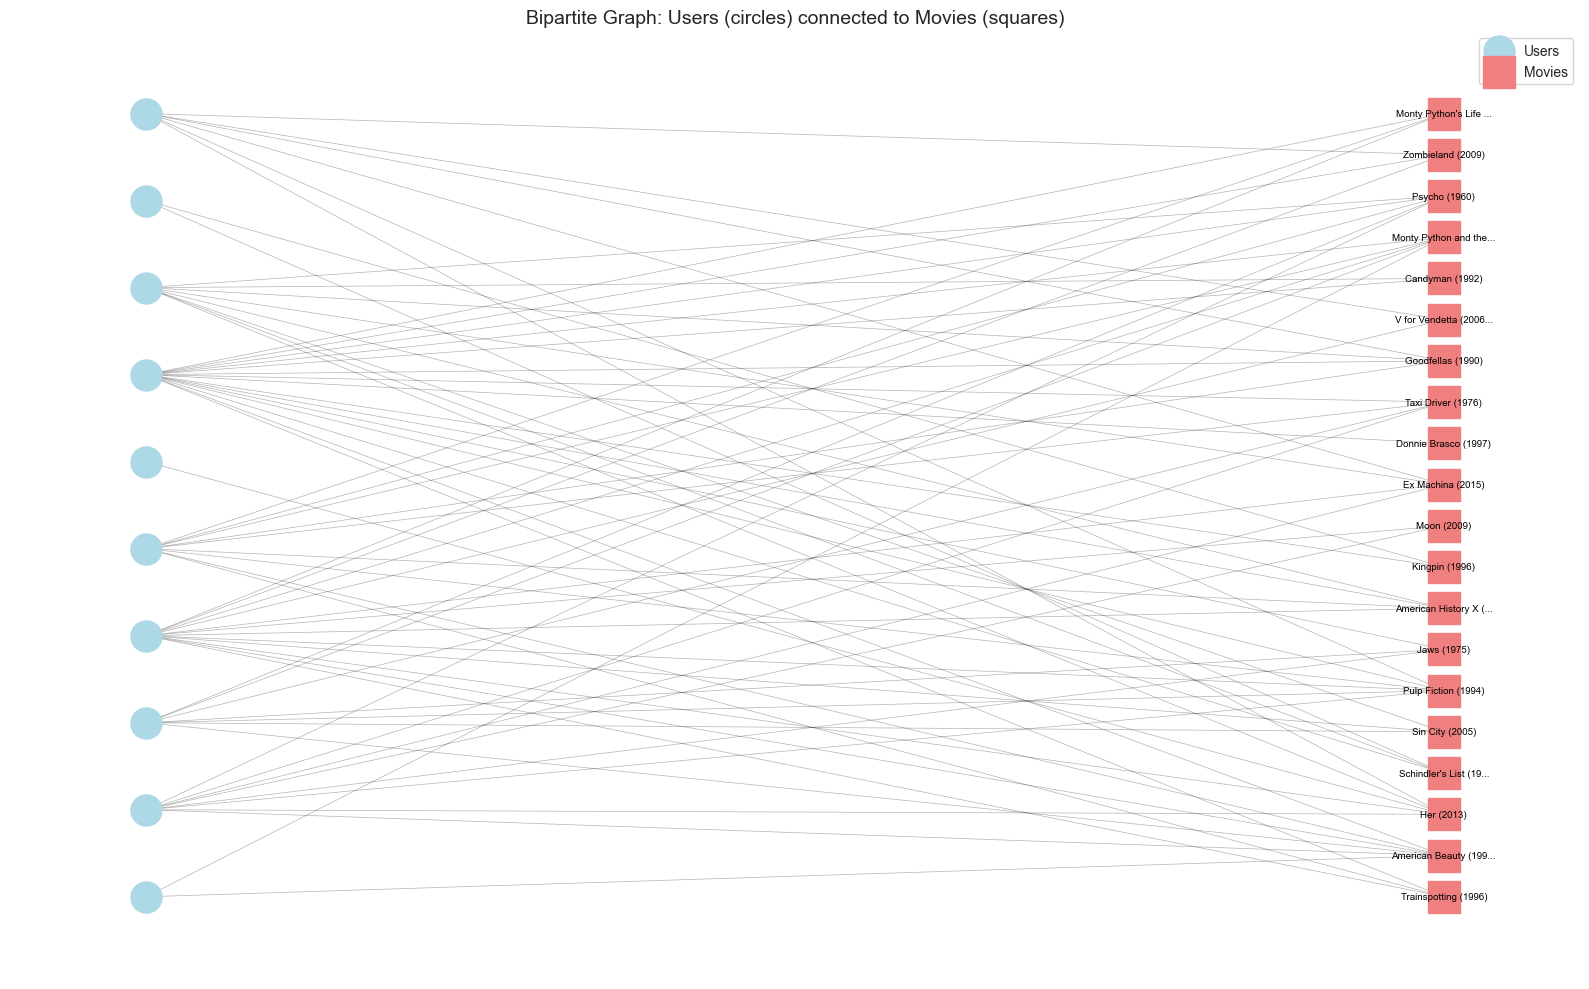

In [13]:
# Visualization of bipartite graph
import networkx as nx
import sys
import os

# Add src to path to import graph module
sys.path.insert(0, os.path.abspath('../src'))
import graph as graph_mod

# Build a small bipartite graph for visualization
ratings_filtered = graph_mod.downsample_users(ratings, min_likes=10, threshold=3.5, sample_n=50)
G, mappings = graph_mod.build_bipartite_graph(ratings_filtered, movies, threshold=3.5)

print(f"Graph contains {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# Get user and movie nodes
user_nodes = [n for n, d in G.nodes(data=True) if d.get('bipartite') == 'user']
movie_nodes = [n for n, d in G.nodes(data=True) if d.get('bipartite') == 'movie']

print(f"Users: {len(user_nodes)}, Movies: {len(movie_nodes)}")

# Sample a smaller subset for clearer visualization
sample_users = user_nodes[:10]  # First 10 users
sample_movies = set()

# Get movies connected to these users
for u in sample_users:
    for m in G.neighbors(u):
        sample_movies.add(m)
        if len(sample_movies) >= 20:  # Limit to 20 movies
            break
    if len(sample_movies) >= 20:
        break

sample_movies = list(sample_movies)

# Create subgraph
subgraph = G.subgraph(sample_users + sample_movies)

# Create bipartite layout
pos = nx.bipartite_layout(subgraph, sample_users)

# Draw the graph
plt.figure(figsize=(16, 10))
nx.draw_networkx_nodes(subgraph, pos, nodelist=sample_users, node_color='lightblue', 
                       node_size=500, label='Users', node_shape='o')
nx.draw_networkx_nodes(subgraph, pos, nodelist=sample_movies, node_color='lightcoral', 
                       node_size=500, label='Movies', node_shape='s')
nx.draw_networkx_edges(subgraph, pos, alpha=0.3, width=0.5)

# Add labels for movie nodes only (more informative)
movie_labels = {}
for m in sample_movies:
    movie_id = mappings['node_to_movie_id'].get(m)
    if movie_id and movie_id in movies['movieId'].values:
        title = movies[movies['movieId'] == movie_id]['title'].values[0]
        # Truncate long titles
        movie_labels[m] = title[:20] + '...' if len(title) > 20 else title

nx.draw_networkx_labels(subgraph, pos, labels=movie_labels, font_size=7)

plt.title('Bipartite Graph: Users (circles) connected to Movies (squares)', fontsize=14)
plt.legend(loc='upper right')
plt.axis('off')
plt.tight_layout()
plt.show()


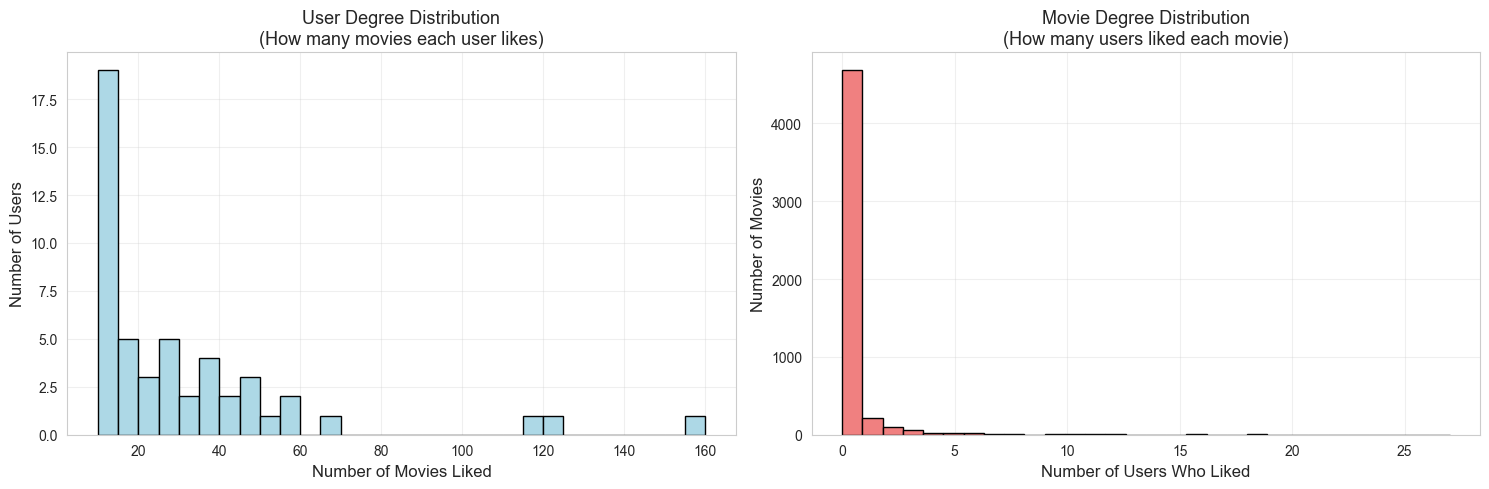

Graph Statistics:
Total nodes: 5225
Total edges: 1561
Average user degree: 31.22 movies
Average movie degree: 0.30 users
Most connected user: 160 movies
Most popular movie: 27 users


In [14]:
# Graph statistics and degree distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# User degree distribution
user_degrees = [G.degree(u) for u in user_nodes]
axes[0].hist(user_degrees, bins=30, color='lightblue', edgecolor='black')
axes[0].set_xlabel('Number of Movies Liked', fontsize=12)
axes[0].set_ylabel('Number of Users', fontsize=12)
axes[0].set_title('User Degree Distribution\n(How many movies each user likes)', fontsize=13)
axes[0].grid(alpha=0.3)

# Movie degree distribution
movie_degrees = [G.degree(m) for m in movie_nodes]
axes[1].hist(movie_degrees, bins=30, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Number of Users Who Liked', fontsize=12)
axes[1].set_ylabel('Number of Movies', fontsize=12)
axes[1].set_title('Movie Degree Distribution\n(How many users liked each movie)', fontsize=13)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Graph Statistics:")
print("=" * 50)
print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")
print(f"Average user degree: {sum(user_degrees)/len(user_degrees):.2f} movies")
print(f"Average movie degree: {sum(movie_degrees)/len(movie_degrees):.2f} users")
print(f"Most connected user: {max(user_degrees)} movies")
print(f"Most popular movie: {max(movie_degrees)} users")


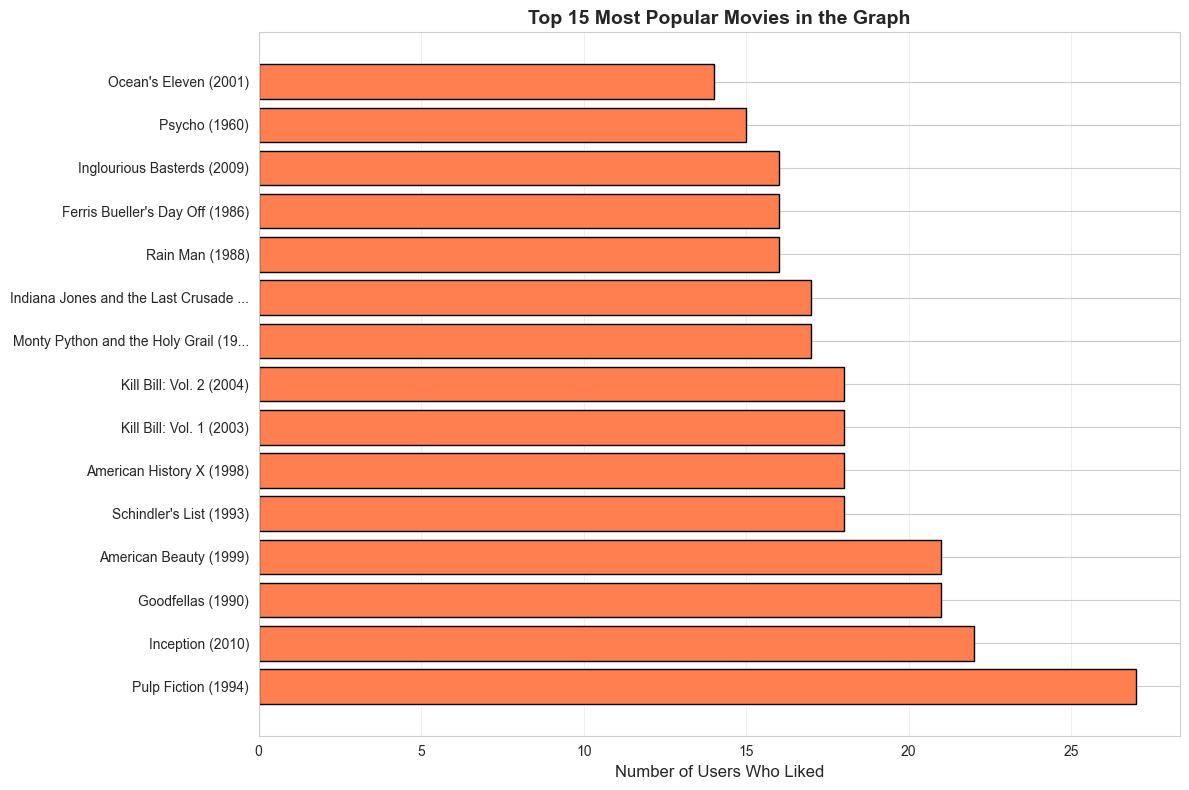

In [15]:
# Visualize most popular movies in the graph
top_n = 15
movie_degree_dict = {m: G.degree(m) for m in movie_nodes}
top_movies = sorted(movie_degree_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Get titles for top movies
movie_titles = []
degrees = []
for movie_node, degree in top_movies:
    movie_id = mappings['node_to_movie_id'].get(movie_node)
    if movie_id and movie_id in movies['movieId'].values:
        title = movies[movies['movieId'] == movie_id]['title'].values[0]
        # Truncate long titles
        title = title[:35] + '...' if len(title) > 35 else title
        movie_titles.append(title)
        degrees.append(degree)

# Create bar plot
plt.figure(figsize=(12, 8))
plt.barh(range(len(movie_titles)), degrees, color='coral', edgecolor='black')
plt.yticks(range(len(movie_titles)), movie_titles, fontsize=10)
plt.xlabel('Number of Users Who Liked', fontsize=12)
plt.title(f'Top {top_n} Most Popular Movies in the Graph', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
